# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.


## Diccionario de datos

A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen:

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

## Plan de solución

Plan de solución para el Paso 1. Descripción de los datos.

El plan es mostrar todos los dataframes del proyecto y examinarlos para tener una idea global. Despues de de leerlos, mostrar como se ven las tablas con display() y tratar de entender la metadata con info().

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame
display(orders.head())

orders.info()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
display(products.head())

products.info()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
display(aisles.head())

aisles.info()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
display(departments.head())

departments.info()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
display(order_products.head())

order_products.info(show_counts=True)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

- DF orders: Cuenta con una cantidad importante de valores ausentes en la columna days_since_prior_order. Probablemente al ser el primer pedido del cliente. Adicionalmente en la misma columna los tipos de datos son float, lo cual podria ser un error.


- DF products: Algunos valores faltantes en la columna product_name.


- DF aisles: Sin valores faltantes o incongruencias en los datos.


- DF departments: Sin valores faltantes o incongruencias en los datos.


- DF order_products: Datos ausentes en la columna add_to_cart_order e igual que en el DF orders, cuenta con propiedades de datos float lo cual podria deberse a un error.


# Paso 2. Preprocesamiento de los datos

## Plan de solución

Plan para el Paso 2. Preprocesamiento de los datos.

El plan es pasar .duplicated() en todos los dataframes y diferentes columnas para encontrar duplicados completos o de columnas especificas. Tambien se filtrarán los valores ausentes para una mejor detección.

## Encontrar y eliminar los valores duplicados.

### `orders` data frame

In [8]:
# Revisar si hay pedidos duplicados
orders.duplicated().sum()

15

In [9]:
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Hay 15 duplicados y tienen en común que todos fueron pedidos ingresados un miércoles a las 2:00 a.m.

In [10]:
# Verificar todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)] 

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


Podemos suponer que no fue un error de todo ese día u hora ya que los duplicados son 15 de los pedidos totales (121). Pudo deberse a que los pedidos ingresaron casi al mismo tiempo y cargaron el procesamiento del servidor lo que genero un error en la validacion de las entradas.

In [11]:
# Eliminar los pedidos duplicados
orders = orders.drop_duplicates().reset_index(drop=True)

In [12]:
# Volver a verificar si hay filas duplicadas
print(orders.duplicated().sum())

0


In [13]:
# Volver a verificar únicamente si hay IDs duplicados de pedidos
print(orders.duplicated(subset='order_id').sum())

0


Se encontraron 15 valores duplicados y fueron eliminados de dataframe.

### `products` data frame

In [14]:
# Verificar si hay filas totalmente duplicadas
print(products.duplicated().sum())

0


In [15]:
# Verificar únicamente si hay IDs duplicadas de productos
print(products.duplicated(subset='product_id').sum())

0


In [16]:
# Revisar únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
print(products['product_name'].duplicated().sum())
products[products['product_name'].duplicated()]

1361


,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [17]:
# Revisar si hay nombres duplicados de productos no faltantes
products[~(products['product_name'].isna()) & (products['product_name'].duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Se encontró que aunque no habian filas completas duplicadas, si existen nombres de producto duplicados. Al convertir todos en mayúsculas se encontró que habian 1361 duplicados y despues de filtrar los datos ausentes se determinó que habian 104 nombres de productos duplicados.

### `departments` data frame

In [18]:
# Revisar si hay filas totalmente duplicadas
print(departments.duplicated().sum())

0


In [19]:
# Revisar únicamente si hay IDs duplicadas de productos
print(departments.duplicated(subset='department_id').sum())

0


No se encontró ningún duplicado. El dataframe esta OK para procesamiento.

### `aisles` data frame

In [20]:
# Revisar si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


In [21]:
# Revisar únicamente si hay IDs duplicadas de productos
print(aisles.duplicated(subset='aisle_id').sum())

0


No se encontró ningún duplicado. El dataframe esta OK para procesamiento.

### `order_products` data frame

In [22]:
# Revisar si hay filas totalmente duplicadas
print(order_products.duplicated().sum())

0


In [23]:
# Volver a verificar si hay cualquier otro duplicado engañoso

print(order_products.duplicated(subset=['order_id', 'product_id']).sum())

0


No se encontró ningún duplicado. Se realizaron combinaciones en distintas columnas para detectar algun posible duplicado pero todo resultó OK.


## Encontrar y eliminar los valores ausentes

Al trabajar con valores duplicados, se pudo observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encontrar los valores ausentes en la columna 'product_name'
products['product_name'].isna().sum()

1258

In [25]:
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Se encontraron 1258 valores ausentes en la columna 'products'.

In [26]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[(products['product_name'].isna()) & (products['aisle_id'] != 100)]

,product_id,product_name,aisle_id,department_id


Se encontró que los valores ausentes en la columna 'producto' están relacionados exclusivamente con el pasillo 100

In [27]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[(products['product_name'].isna()) & (products['department_id'] != 21)]

,product_id,product_name,aisle_id,department_id


Se encontró que los valores ausentes en la columna 'producto' están relacionados exclusivamente con el ID 21.

In [28]:
# Usar las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(aisles[aisles['aisle_id'] == 100])
print(departments[departments['department_id'] == 21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Se encontró que los valores ausentes en la columna 'producto' están relacionados exclusivamente con el 'aisle_id'=100 y el 'department_id'=21 por lo que sus columnas respectivas de 'aisle' y 'department' muestran el valor 'missing'.

In [29]:
# Completar los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Completé los valores ausente con el valor 'Unknown'.

### `orders` data frame

In [30]:
# Encontrar los valores ausentes
orders[orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


In [31]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Se comprobó que todos los valores ausentes de la columna 'days_since_prior_order' corresponden al primer pedido del cliente.

### `order_products` data frame

In [32]:
# Encontrar los valores ausentes
order_products[order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [33]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


Se puede observar que existen 836 valores ausentes en la columna 'add_to_cart_order' y que existen pedidos que han ingresado al carrito hasta 64 productos.

In [34]:
# Guardar todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
miss_add_to_cart_order_id = order_products[order_products['add_to_cart_order'].isna()]['order_id']

In [35]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
orders_grp = order_products[order_products['order_id'].isin(miss_add_to_cart_order_id)].groupby('order_id')
orders_grp['product_id'].count().min()

65

Se encontró que todos los pedidos con valores ausentes en 'add_to_cart_order' contenian minimo 65 ingresos de productos al carrito. Es posible que exista algun error de programación de la plataforma de compra que no permita ingresar mas de 64 productos al carrito.

In [36]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Reemplacé los valores ausentes de la columna 'add_to_cart_order' por el número 999 y cambie tipo de datos a int64.

## Conclusiones

- DF orders: Se encontraron 15 valores duplicados y fueron eliminados de dataframe. Se comprobó que todos los valores ausentes de la columna 'days_since_prior_order'corresponden al primer pedido del cliente. 


- DF products: Se encontró que aunque no habian filas completas duplicadas, si existen nombres de producto duplicados. Al convertir todos en mayúsculas se encontró que habian 1361 duplicados y despues de filtrar los datos ausentes se determinó que habian 104 nombres de productos duplicados. Se encontraron 1258 valores ausentes en la columna 'products'.


- DF aisles: No se encontró ningún duplicado. No se encontró ningún valor ausente. El dataframe esta OK para procesamiento. 


- DF departments: No se encontró ningún duplicado. No se encontró ningún valor ausente. El dataframe esta OK para procesamiento.


- DF order_products: No se encontró ningún duplicado. Se realizaron combinaciones en distintas columnas para detectar algun posible duplicado pero todo resultó OK. Reemplacé los valores ausentes de la columna 'add_to_cart_order' por el número 999 y cambie tipo de datos a int64.

# Paso 3. Análisis de los datos

# [A] Fácil (deben completarse todos para aprobar)

1. Verificar que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crear un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crear un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crear un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [37]:
sorted(orders['order_hour_of_day'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [38]:
sorted(orders['order_dow'].unique())

[0, 1, 2, 3, 4, 5, 6]


Los datos si son razonables y se encuentran entre los rangos esperados.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

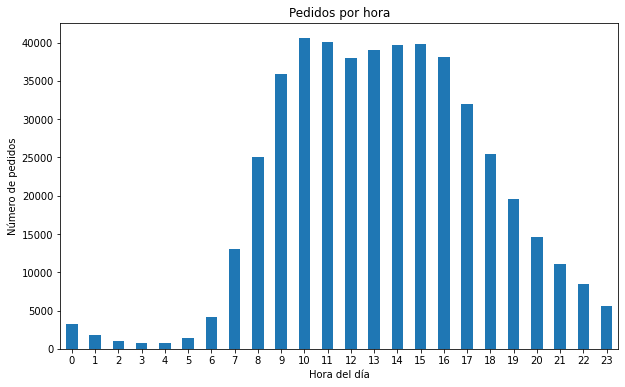

In [39]:
hourly_orders = orders['order_hour_of_day'].value_counts().sort_index()

hourly_orders.plot(kind='bar',
                   title= 'Pedidos por hora',
                   xlabel= 'Hora del día',
                   ylabel= 'Número de pedidos',
                   figsize = (10,6),
                   rot = 0
                  )
plt.show()

En este grafico se muestra que a partide las 6:00 horas se empieza a incrementar la realización de pedidos alcanzando su pico a las 10:00 horas. Se mantiene cerca de los maximos numeros hasta las 17:00 horas en que comienza a reducirse la cantidad de pedidos y llegar a su minimo a las 3:00 horas. 

### [A3] ¿Qué día de la semana compran víveres las personas?

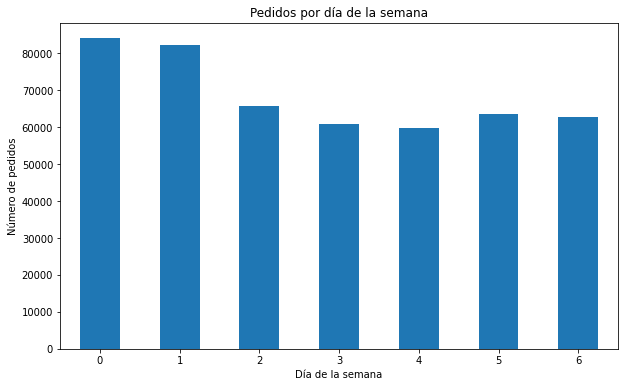

In [40]:
daily_orders = orders['order_dow'].value_counts().sort_index()

daily_orders.plot(kind='bar',
                   title= 'Pedidos por día de la semana',
                   xlabel= 'Día de la semana',
                   ylabel= 'Número de pedidos',
                  figsize = (10,6),
                   rot = 0
                  )
plt.show()

Los días que más se realizan las compras son los domingos y lunes. Se explica ya que los domingos son los dias libres de la mayoria de las personas que laboran de lunes a viernes/sabado y los lunes serian los días libres de las personas de laboran domingos asi como el inicio de la semana para las personas que administran el hogar.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

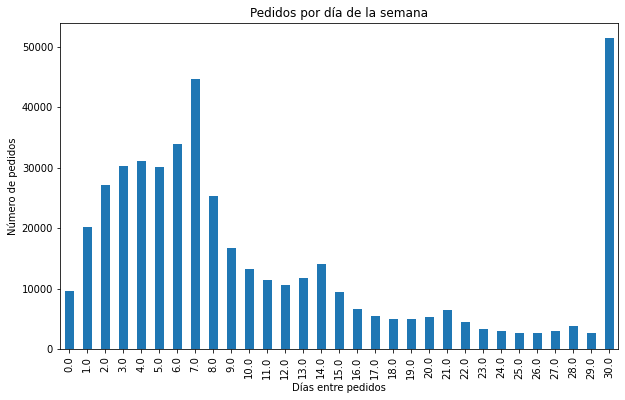

9589
51337


In [41]:
order_time = orders['days_since_prior_order'].value_counts().sort_index()

order_time.plot(kind='bar',
               title= 'Pedidos por día de la semana',
               xlabel= 'Días entre pedidos',
               ylabel= 'Número de pedidos',
                figsize = (10,6),
                rot = 90
                  )
plt.show()

order_time_0 = orders['days_since_prior_order'] == 0
print(order_time_0.sum())
order_time_30 = orders['days_since_prior_order'] == 30
print(order_time_30.sum())

La mayor cantidad de pedidos (51337) se hacen cada 30 días debido a que muchos clientes realizan sus compras de manera mensual coincidiendo con el abono de su salario. 

La siguiente mayor frecuencia de compra seria cada 7 días, probablemente porque es la frecuencia en que las personas que reciben un pago semanal cobran su salario o es la costumbre en muchas familias hacerlo una vez a la semana.

Finalmente existen 9589 en la marca 0.0 que corresponderian a pedidos que se realizaron el mismo día de haber hecho otro pedido, por lo que no ha trascurrido ningun dia entre un pedido y otro.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. GraficaR la distribución para el número de órdenes que hacen los clientes.
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`.

In [42]:
hour_of_day_wed = orders[orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
hour_of_day_sat = orders[orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()

In [43]:
hour_of_day_graph = pd.concat([hour_of_day_wed, hour_of_day_sat], axis = 1)
hour_of_day_graph.columns = ['hour_of_day_wed', 'hour_of_day_sat']

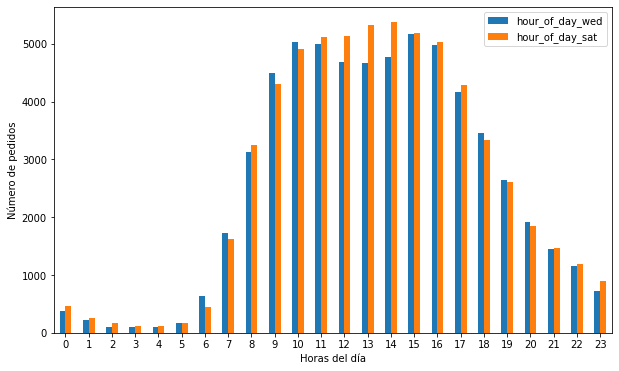

In [44]:
hour_of_day_graph.plot(kind = 'bar',
                       xlabel = 'Horas del día',
                       ylabel = 'Número de pedidos',
                       rot = 0,
                       figsize = (10,6)
                      )
plt.show()

EN general el comportamiento es casi el mismo los dos días. Existe una diferencia durante las 12 a 14 horas en la que el sabado se realizan mas operaciones. Puede deberse a que el sábado es un día no laboral para muchas personas, las que incrementan su consumo de productos ya preparados.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [45]:
orders_by_client = orders['user_id'].value_counts().sort_index()
print(orders_by_client.min())
print(orders_by_client.max())

1
28


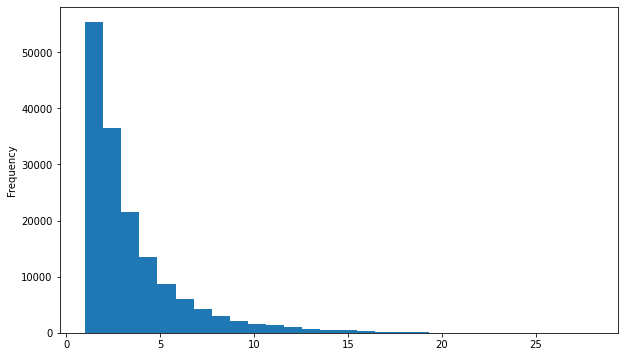

In [46]:
orders_by_client.plot(kind = 'hist', bins = 28, figsize = (10,6))

plt.show()

En el gráfico se muestra que la mayoría de los clientes realiza un solo pedido y se reduce drasticamente la cantidad de clientes que hacen multiples pedidos. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:
prod_id_merged = order_products.merge(products, on = 'product_id')
prod_id_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23,0,CHICKEN BREAST TENDERS BREADED,129,1


In [48]:
top_prod = prod_id_merged.groupby(['product_id', 'product_name']).count().sort_values('order_id', ascending = False)

In [49]:
top_prod[['order_id']].head(20)

,,order_id
product_id,product_name,
24852,BANANA,66050
13176,BAG OF ORGANIC BANANAS,53297
21137,ORGANIC STRAWBERRIES,37039
21903,ORGANIC BABY SPINACH,33971
47209,ORGANIC HASS AVOCADO,29773
47766,ORGANIC AVOCADO,24689
47626,LARGE LEMON,21495
16797,STRAWBERRIES,20018
26209,LIMES,19690


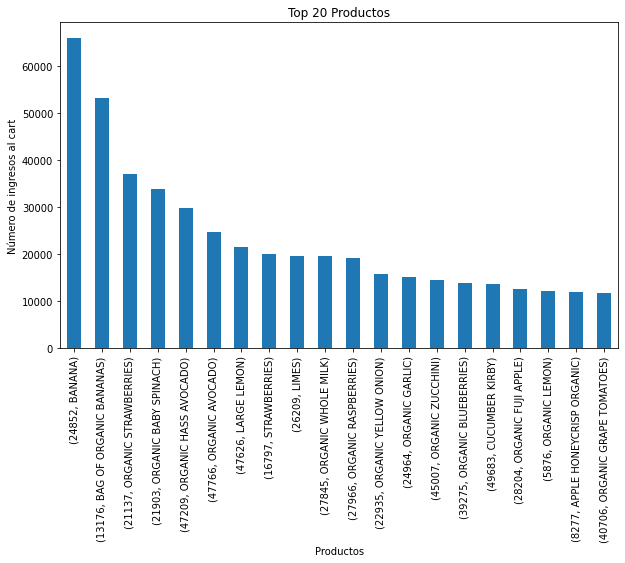

In [50]:
top_prod_20 = top_prod['order_id'].head(20)

top_prod_20.plot(kind='bar',
                 title= 'Top 20 Productos',
                 xlabel= 'Productos',
                 ylabel= 'Número de ingresos al cart',
                 rot = 90,
                 legend = False,
                 figsize = (10,6)
                )
plt.show()


Las bananas y las bananas organicas son los productos mas comprados por los clientes.

# [C] Difícil

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? 
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [51]:
number_of_items = order_products.groupby('order_id')['product_id'].count()

hist_values = number_of_items.value_counts().sort_index()

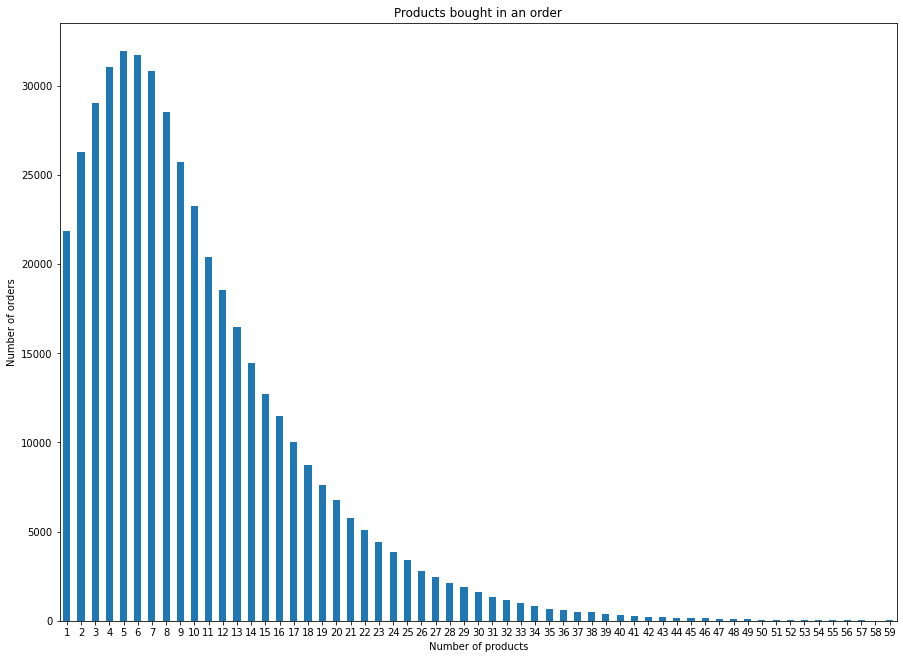

In [52]:
hist_values[hist_values.index < 60].plot(kind = 'bar',
                                         title = 'Products bought in an order',
                                         xlabel = 'Number of products',
                                         ylabel = 'Number of orders',
                                         rot = 0,
                                         figsize = (15, 11)
                )
plt.show()

In [53]:
number_of_items.mean().round()

10.0

Las personas compran en promedio 10 articulos por pedido. La distribución se nos muestra como asimétrica positiva. Se observa como los primeros valores cuentan con una mayor frecuencia y despues de los los 5-6 productos comienza a descender progresivamente hasta el valor mínimo. Esto se daría porque un grupo considerable de los clientes hace compras no muy voluminosas y otro grupo realiza compras grandes, normalmente los que hacen pedidos mensuales.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia?

In [54]:
products_reorders = order_products[order_products['reordered'] == 1]

In [55]:
reorder_merged = products_reorders.merge(products, on = 'product_id')
display(reorder_merged.head())

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,567889,1560,1,1,BAG OF ICE,37,1
1,761899,1560,2,1,BAG OF ICE,37,1
2,1388514,1560,8,1,BAG OF ICE,37,1
3,2629631,1560,1,1,BAG OF ICE,37,1
4,866921,1560,6,1,BAG OF ICE,37,1


In [56]:
top_reorder = reorder_merged.groupby(['product_id', 'product_name']).sum().sort_values('order_id', ascending = False)

In [57]:
top_reorder[['reordered']].head(20)

,,reordered
product_id,product_name,
24852,BANANA,55763
13176,BAG OF ORGANIC BANANAS,44450
21137,ORGANIC STRAWBERRIES,28639
21903,ORGANIC BABY SPINACH,26233
47209,ORGANIC HASS AVOCADO,23629
47766,ORGANIC AVOCADO,18743
27845,ORGANIC WHOLE MILK,16251
47626,LARGE LEMON,15044
27966,ORGANIC RASPBERRIES,14748


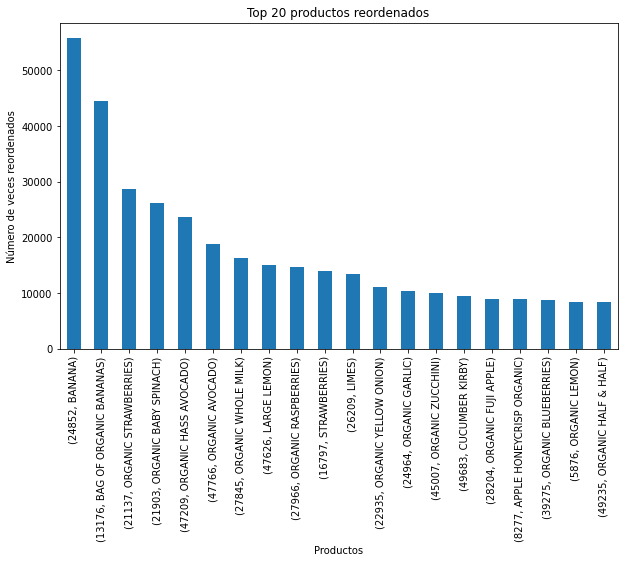

In [58]:
top_20_reordered = top_reorder[['reordered']].head(20)

top_20_reordered.plot(kind='bar',
                 title= 'Top 20 productos reordenados',
                 xlabel= 'Productos',
                 ylabel= 'Número de veces reordenados',
                 rot = 90,
                 legend = False,
                 figsize = (10,6)
                )
plt.show()


Los dos primeros son los mismos de los Top 20 más ordenados.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [59]:
orders.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [60]:
products.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [61]:
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [62]:
df_merged = orders.merge(order_products, on = 'order_id').merge(products, on = 'product_id')
df_merged.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1515936,183418,11,6,13,30.0,19048,1,1,ORGANIC BUTTERNUT SQUASH,83,4
1,787445,25685,1,6,18,NaN,19048,16,0,ORGANIC BUTTERNUT SQUASH,83,4
2,1646929,205815,37,5,13,8.0,19048,11,0,ORGANIC BUTTERNUT SQUASH,83,4
3,276490,1004,24,1,12,11.0,19048,1,1,ORGANIC BUTTERNUT SQUASH,83,4
4,1300214,33481,7,5,9,6.0,19048,9,1,ORGANIC BUTTERNUT SQUASH,83,4


In [63]:
reordered_rate_products = df_merged.groupby(['product_id', 'product_name'])['reordered'].mean()
reordered_rate_products.reset_index()

,product_id,product_name,reordered
0,1,CHOCOLATE SANDWICH COOKIES,0.564286
1,2,ALL-SEASONS SALT,0.000000
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,0.738095
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,0.510204
4,7,PURE COCONUT WATER WITH ORANGE,0.500000
...,...,...,...
45568,49690,HIGH PERFORMANCE ENERGY DRINK,0.800000
45569,49691,ORIGINAL PANCAKE & WAFFLE MIX,0.430556
45570,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,0.416667
45571,49693,SPRING WATER BODY WASH,0.440000


In [64]:
reordered_rate_products.mean()

0.38670677893645

Han sido reordenados múltiples veces. El promedio de reorden de los productos es de 38.67%.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [65]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [66]:
df_merged = order_products.merge(orders, on = 'order_id')
df_merged.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17,0,58454,25,0,15,8.0
1,2141543,31869,15,1,58454,25,0,15,8.0
2,2141543,30233,9,1,58454,25,0,15,8.0
3,2141543,27966,20,1,58454,25,0,15,8.0
4,2141543,13176,2,1,58454,25,0,15,8.0


In [67]:
reordered_rate_client = df_merged.groupby('user_id')['reordered'].mean()
reordered_rate_client.reset_index()

,user_id,reordered
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.928571
...,...,...
149621,206203,0.222222
149622,206206,0.714286
149623,206207,0.891304
149624,206208,0.696000


In [68]:
reordered_rate_client.mean()

0.4948531736151642

Se observa que en promedio los clientes reordenan el 49.48% de sus productos.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [69]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [70]:
df_orders = order_products.merge(products)
df_orders.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23,0,CHICKEN BREAST TENDERS BREADED,129,1


In [71]:
df_orders = df_orders[df_orders['add_to_cart_order'] == 1]
df_orders_grp = df_orders.groupby(['product_id', 'product_name']).sum().sort_values('add_to_cart_order', ascending = False)

In [72]:
df_orders_grp[['add_to_cart_order']].head(20)

,,add_to_cart_order
product_id,product_name,
24852,BANANA,15562
13176,BAG OF ORGANIC BANANAS,11026
27845,ORGANIC WHOLE MILK,4363
21137,ORGANIC STRAWBERRIES,3946
47209,ORGANIC HASS AVOCADO,3390
21903,ORGANIC BABY SPINACH,3336
47766,ORGANIC AVOCADO,3044
19660,SPRING WATER,2336
16797,STRAWBERRIES,2308


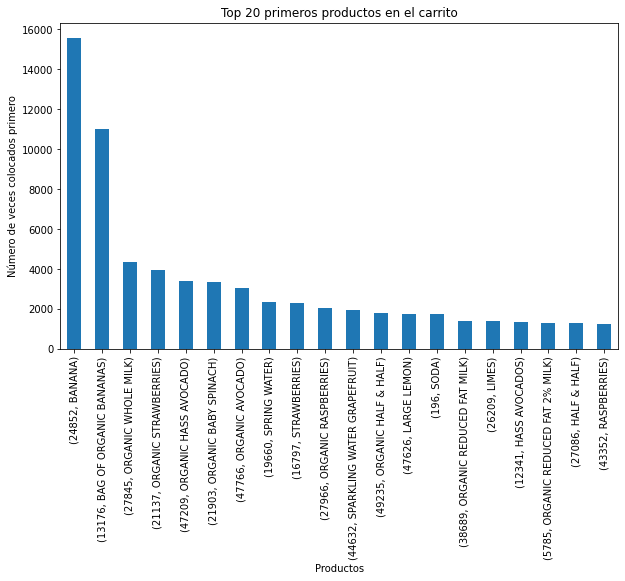

In [73]:
top_20_atc = df_orders_grp[['add_to_cart_order']].head(20)

top_20_atc.plot(kind='bar',
                 title= 'Top 20 primeros productos en el carrito',
                 xlabel= 'Productos',
                 ylabel= 'Número de veces colocados primero',
                 rot = 90,
                 legend = False,
                 figsize = (10,6)
                )
plt.show()

De nuevo las bananas con fueron el articulo que mas veces fue incluido en primer lugar de todos los productos con 15562 primeras inclusiones en los carritos de compra. 

### Conclusion general del proyecto:

- La elaboración de gráficos utilizando matplotlib lleva el analisis a otro nivel y permite observar los datos con una nueva perspectiva, generarando insights que no son posibles solamente con el filtrado de dataframes; enriqueciendo mucho el análisis.


- Sobre el dataset analizado en este proyecto, se pudieron determinar diferentes comportamientos de los clientes (horarios y dias de compra), asi como que productos son los de mayor frecuencia de compra, su reincidencia en nuevas órdenes y la preferencia en el orden que son colocados en el carrito.